# Phân tích dữ liệu chứng khoán

In [1]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Đọc dữ liệu
stock = pd.read_csv(r'D:\chuoitg\Thực hành\train_files\stock_prices.csv', 
                         parse_dates=['Date']).set_index('Date')

In [3]:
# Lọc dữ liệu cổ phiếu 1332
stock1332 = stock[stock.SecuritiesCode==1332][['Close']].dropna()
stock1332.head()

,Close
Date,
2017-01-04,571.0
2017-01-05,568.0
2017-01-06,575.0
2017-01-10,562.0
2017-01-11,553.0


In [4]:
# Xem thông tin bảng dữ liệu
stock1332.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1201 entries, 2017-01-04 to 2021-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1201 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


<AxesSubplot: xlabel='Date'>

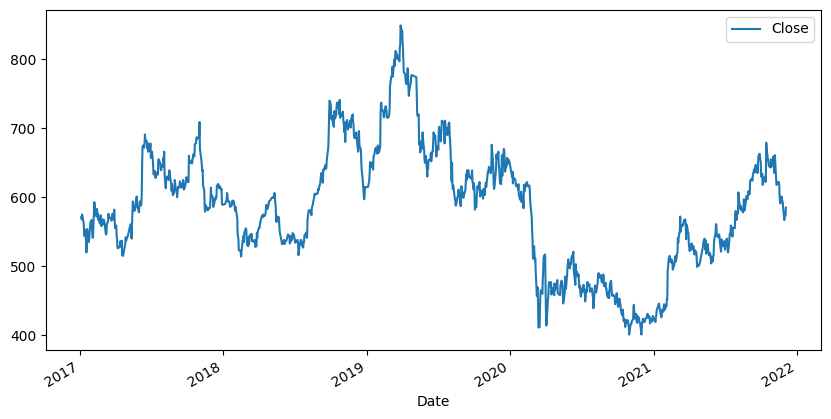

In [5]:
# Biểu diễn hình ảnh
stock1332.plot(figsize=(10,5))

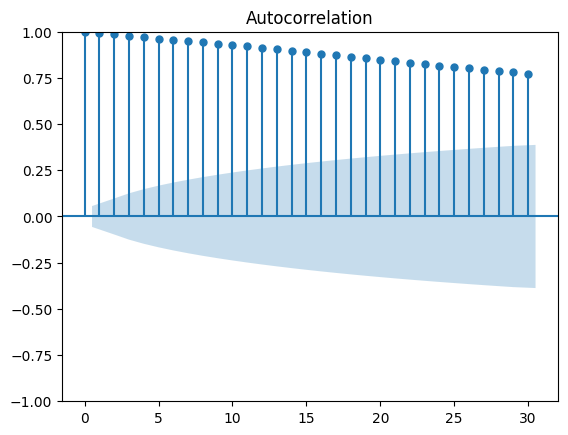

In [6]:
# Biểu đồ tự tương quan ACF
fig = plot_acf(stock1332, lags=30)

**Nhận xét**: biểu đồ acf giảm chậm, tuyến tính về 0 nên chuỗi thời gian là không dừng.

=> lấy sai phân

<AxesSubplot: xlabel='Date'>

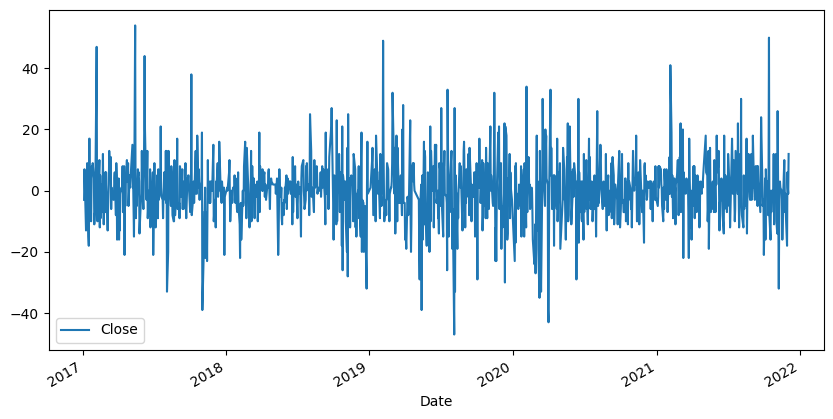

In [7]:
# Lấy sai phân
data = stock1332.diff().dropna()
data.plot(figsize=(10,5))

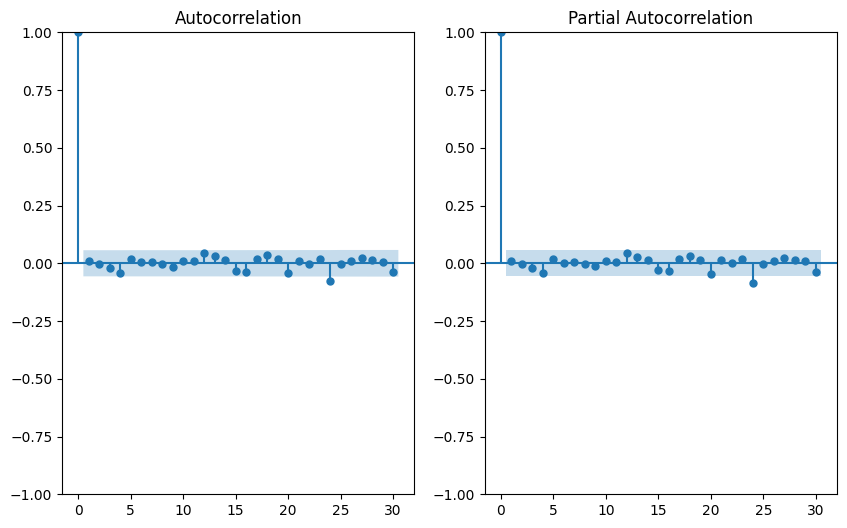

In [8]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
fig = plot_acf(data, lags = 30, ax = ax[0])
fig = plot_pacf(data, lags = 30, method = 'ywm', ax = ax[1])

In [9]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(stock1332,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9108.229, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9110.090, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9110.090, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9106.231, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9112.093, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.001 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1201
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4552.115
Date:                Tue, 20 Dec 2022   AIC                           9106.231
Time:                        08:24:44   BIC                           9111.321
Sample:                             0   HQIC                          9108.148
                               - 1201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       115.4681      3.006     38.408      0.000     109.576     121.360
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               434.78
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.22
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Nhận xét**: chuỗi sai phân là chuỗi dừng => sử dụng ARMA(p,q) để mô hình hoá chuỗi sai phân.

=> Chọn bậc: dựa vào 2 biểu đồ acf, pacf, ta chọn $p=0$; $q=0$

=> Quá trình ARIMA tương ứng có bậc (0,1,0)

In [16]:
# Ước lượng mô hình
model = ARIMA(stock1332.values, order=(1,2,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1201
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -4790.039
Date:                Tue, 20 Dec 2022   AIC                           9584.078
Time:                        08:25:11   BIC                           9594.256
Sample:                             0   HQIC                          9587.912
                               - 1201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4937      0.019    -25.486      0.000      -0.532      -0.456
sigma2       172.7672      5.014     34.460      0.000     162.941     182.594
===================================================================================
Ljung-Box (L1) (Q):                  29.83   Jarque-Bera (JB):               213.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.29
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# Tham số ước lượng
result.params

array([228.50929392])

**Kết quả**: Mô hình ARIMA có dạng
$$\nabla y_t = a_t $$

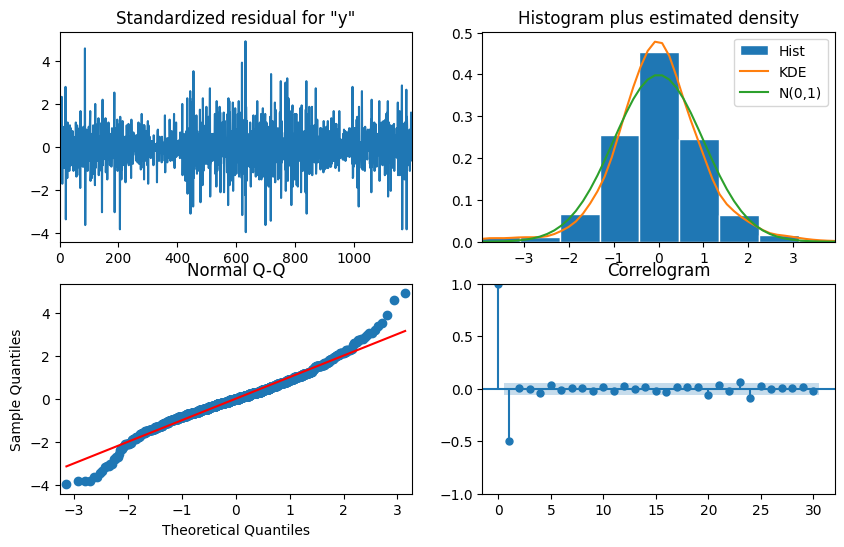

In [13]:
# Đánh giá mô hình bằng phần dư
fig = plt.figure(figsize=(10, 6))
fig = result.plot_diagnostics(fig=fig, lags=30)

**Kết luận**: phần dư là nhiễu trắng Gauss

In [14]:
# Đánh giá mô hình bằng Qstat
res = result.resid
r, q, p = acf(res, nlags=20, qstat=True)
pd.DataFrame(np.array([np.arange(1, 21), r[1:], q, p]).T,
             columns=["lag", "acf", "Qstat", "pvalue"]).set_index('lag')

,acf,Qstat,pvalue
lag,,,
1.0,-0.443231,236.531204,2.244297e-53
2.0,0.017902,236.917383,3.581327e-52
3.0,-0.017721,237.296119,3.657687e-51
4.0,-0.012645,237.489116,3.222178e-50
5.0,0.007394,237.555168,2.567374e-49
6.0,0.021726,238.125880,1.410718e-48
7.0,-0.017245,238.485746,7.800221e-48
8.0,-0.015888,238.791436,4.081979e-47
9.0,0.021656,239.359894,1.753354e-46


**Nhận xét**: Ở độ trễ 20, Qstat = 4.740742 với p-value = 0.999817

=> Với mức ý nghĩa 5%, mô hình phù hợp với dữ liệu

### Dự báo 5 ngày giao dịch tiếp theo

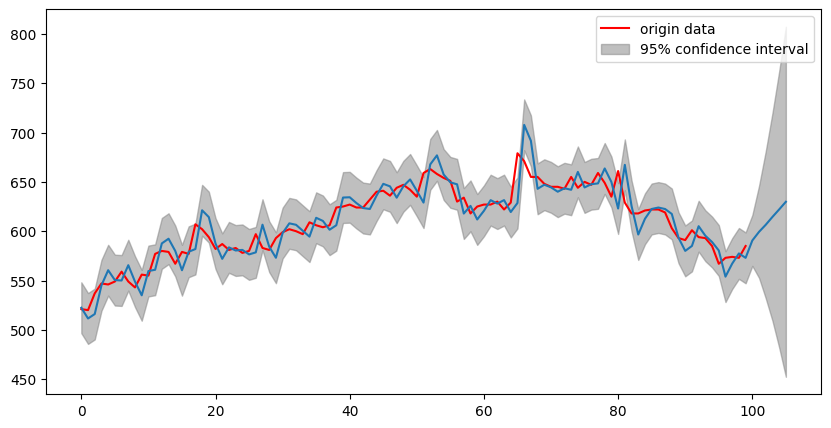

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(stock1332.values[-100:],'-',color='red', label = 'origin data')
fig = plot_predict(result,
                   start = stock1332.shape[0]-100,
                   end = stock1332.shape[0]+5,
                   ax=ax)